In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [10]:
data = pd.read_csv("psychology.csv")
data['Decision Date'] = pd.to_datetime(data['Decision Date'], errors='coerce')
data['Date Added'] = pd.to_datetime(data['Date Added'], errors='coerce')

In [11]:
def get_interpolated_data(data):
    min_date = pd.to_datetime(data['ds'].min())
    max_date = pd.to_datetime(data['ds'].max())
    date_range = pd.date_range(min_date, max_date, freq='D')
    date_range_df = pd.DataFrame(date_range, columns=['ds'])
    interpolated_df = pd.merge(date_range_df, data, on='ds', how='left')
    for col in data.columns:
        if col != 'ds':
            interpolated_df[col] = interpolated_df[col].interpolate(method='linear')
    return interpolated_df

In [12]:
def make_prediction(train_data, periods):
    model = Prophet(daily_seasonality=True)
    model.fit(train_data)
    future_dates = model.make_future_dataframe(periods=periods, freq='D', include_history=False)
    return model.predict(future_dates)


In [16]:
def evaluate_prediction(prediction, true_data):
    prediction = prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    comparison = pd.merge(true_data, prediction, on='ds', how='inner')


    mae = mean_absolute_error(comparison['y_true'], comparison['yhat'])
    mse = mean_squared_error(comparison['y_true'], comparison['yhat'])

    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(comparison['ds'], comparison['y_true'], label='Actual', marker='o')
    plt.plot(comparison['ds'], comparison['yhat'], label='Predicted', marker='x')
    plt.fill_between(comparison['ds'], comparison['yhat_lower'], comparison['yhat_upper'], color='k', alpha=0.1)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Number of Decisions')
    plt.title('Actual vs. Predicted Decisions')
    plt.show()

In [44]:
def predict_and_evaluate_post_per_day(data, interpolate_data = False):
    decisions = ['All', 'Interview', 'Accepted', 'Rejected']
    for decision in decisions:
        print("Predict and evaluate {} post per day".format(decision))
        if decision == 'All':
            post_per_day = data.groupby(['Decision Date']).size().reset_index(name='Count')
        else:
            post_per_day = data[data['Decision'] == decision].groupby(['Decision Date']).size().reset_index(name='Count')

        post_per_day['Decision Year'] = post_per_day['Decision Date'].dt.year
        train = post_per_day[post_per_day['Decision Year'] < 2019].drop('Decision Year', axis=1)
        train.columns = ['ds', 'y']
        test = post_per_day[post_per_day['Decision Year'] >= 2019].drop('Decision Year', axis=1)
        test.columns = ['ds', 'y_true']

        if interpolate_data:
            train = get_interpolated_data(train)
            test = get_interpolated_data(test) 
        pred = make_prediction(train, 365 * 3)
        evaluate_prediction(pred, test)

Predict and evaluate All post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 15.11
Mean Squared Error (MSE): 371.69


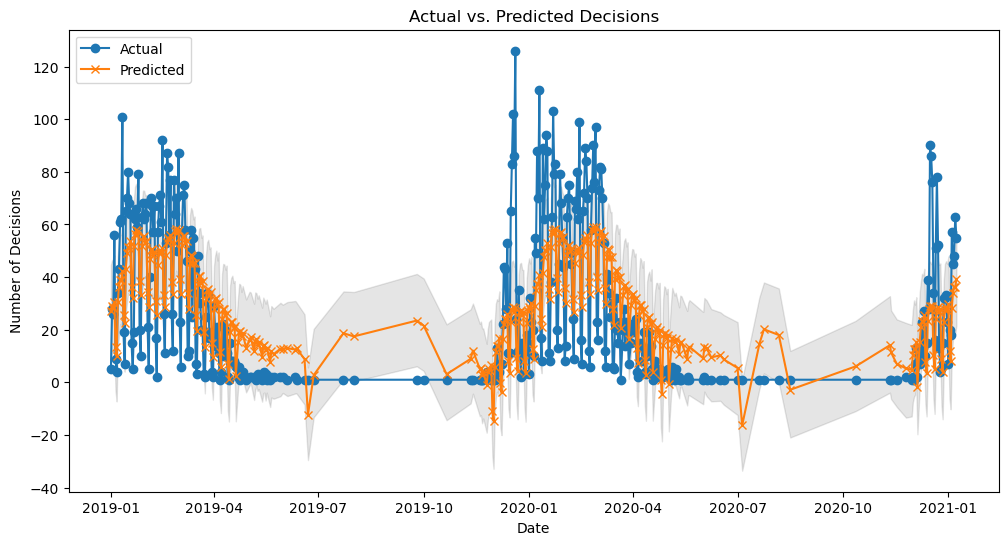

Predict and evaluate Interview post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 10.32
Mean Squared Error (MSE): 210.84


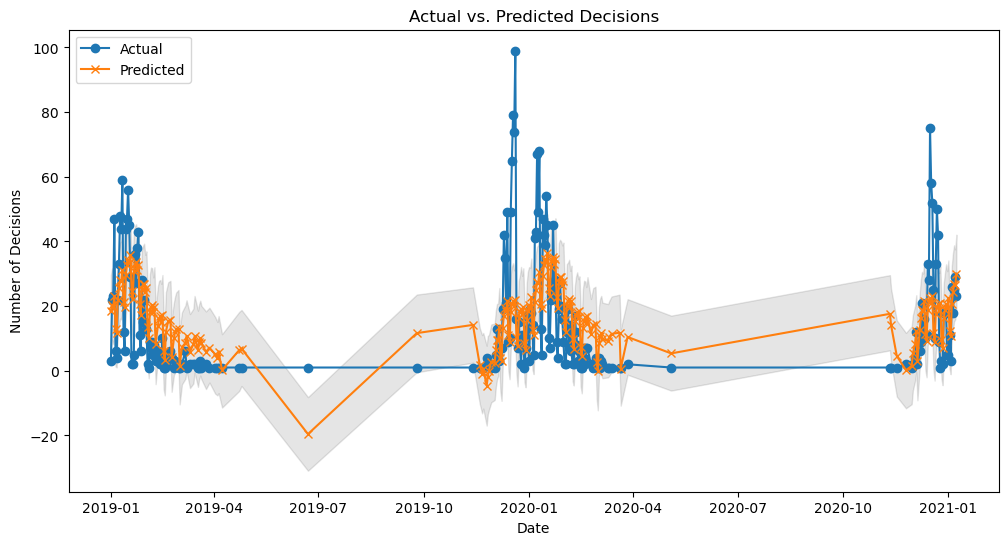

Predict and evaluate Accepted post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 3.92
Mean Squared Error (MSE): 29.92


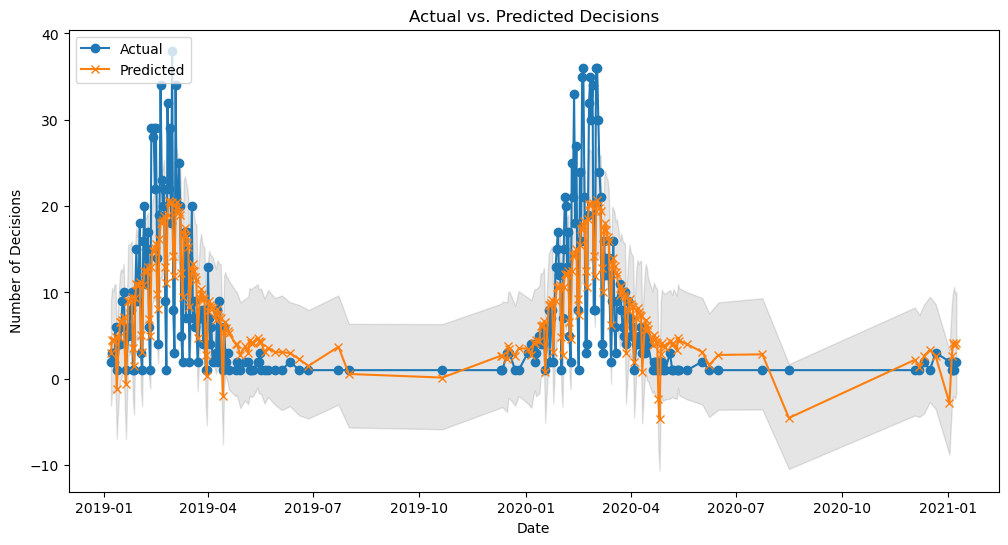

Predict and evaluate Rejected post per day


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 5.02
Mean Squared Error (MSE): 51.46


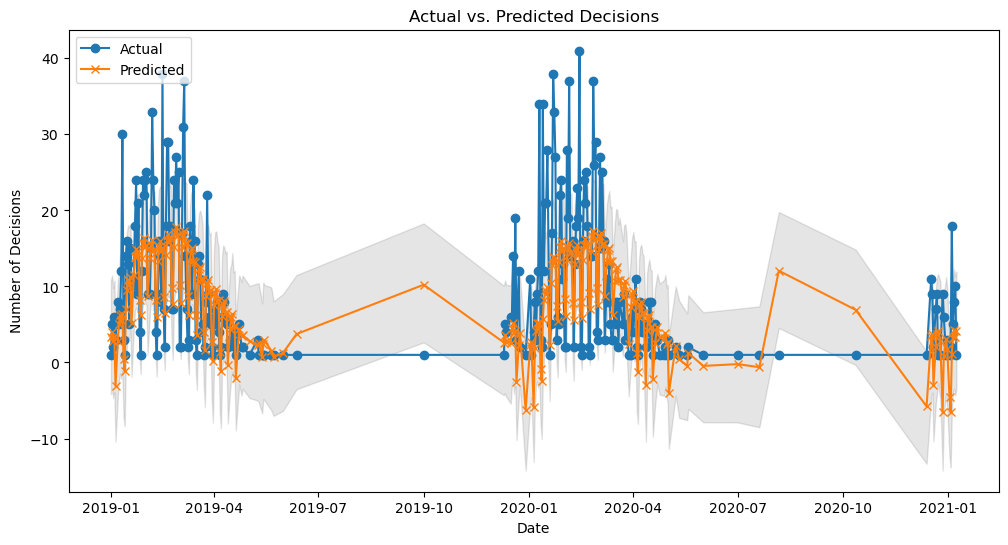

In [45]:
predict_and_evaluate_post_per_day(data, interpolate_data = False)

Predict All post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 10.70
Mean Squared Error (MSE): 302.77


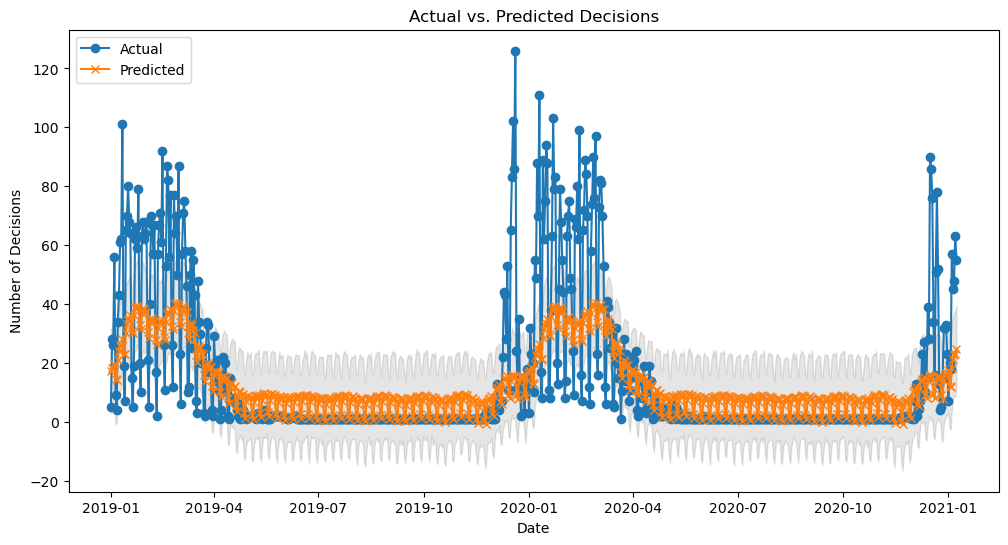

Predict Interview post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 4.23
Mean Squared Error (MSE): 89.36


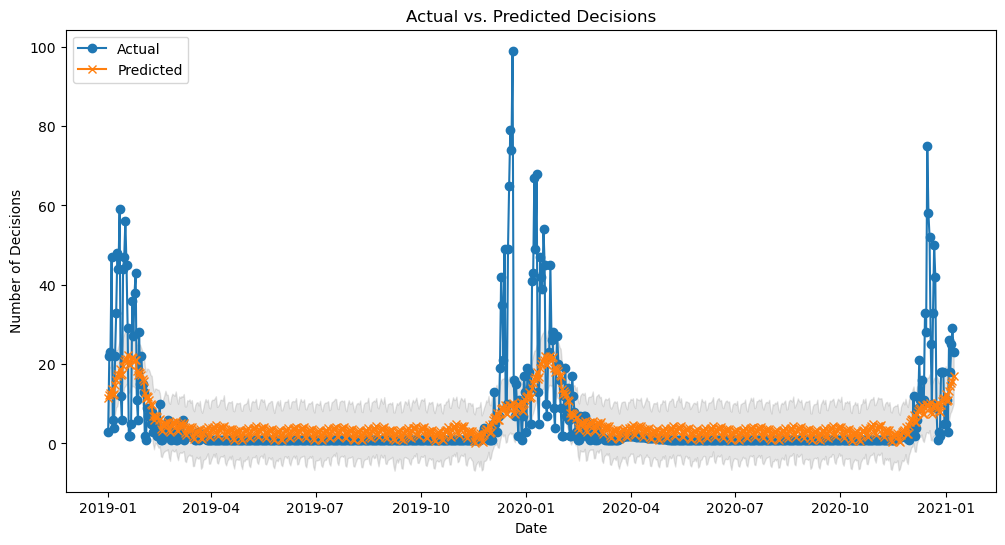

Predict Accepted post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 2.19
Mean Squared Error (MSE): 18.91


Predict Rejected post numbers per day.


C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\hsiny\anaconda3\envs\dsw\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Absolute Error (MAE): 2.65
Mean Squared Error (MSE): 24.95


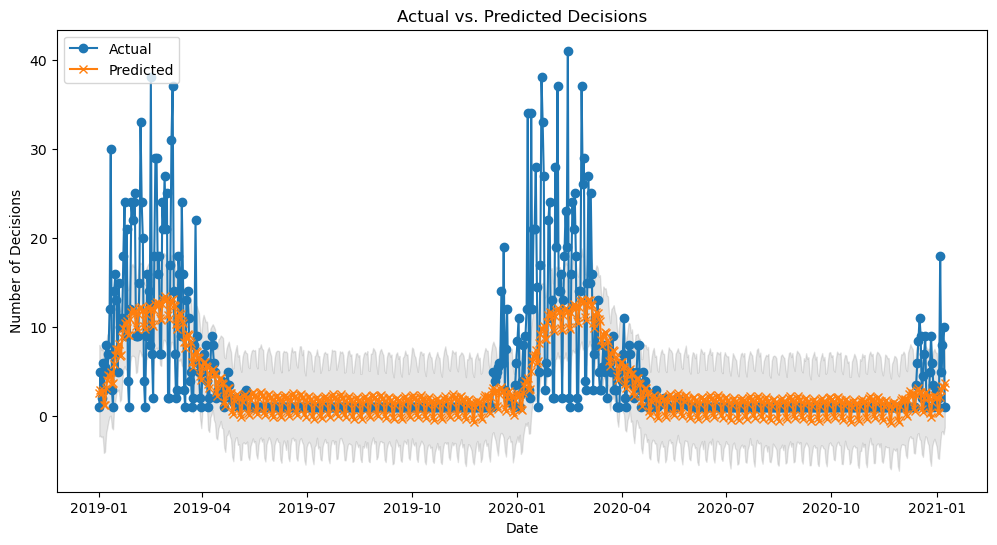

In [19]:
predict_and_evaluate_post_per_day(data, interpolate_data = true)

In [24]:
len(data[data["GPA"].notna()]) / len(data)

0.16899673718101083

In [26]:
print(len(data[data["GRE Verbal"].notna()]))
print(len(data[data["GRE Quantitive"].notna()]))
print(len(data[data["GRE Writing"].notna()]))
print(len(data[data["GRE Subject"].notna()]))

8316
8316
8316
1974


In [31]:
print(len(data[data["Notes"].notna()]))

30853


In [29]:
print(len(data[(data["GPA"].notna() & data["GRE Verbal"].notna() & data["GRE Quantitive"].notna() & data["GRE Writing"].notna() )]))

7821


In [30]:
data

University  \
0               Colorado State University - Fort Collins   
1                         University Of Nebraska–Lincoln   
2                                   University Of Kansas   
3                            Georgia Southern University   
4                            Georgia Southern University   
...                                                  ...   
46274                              Binghamton University   
46275                               CUNY Graduate Center   
46276                  University Of Michigan, Ann Arbor   
46277  Rosalind Franklin University of Medicine And S...   
46278                                  Auburn University   

                               Program  Degree Entrance Semester   Decision  \
0                Counseling Psychology    PhD                F21      Other   
1                  Clinical Psychology    PhD                F21  Interview   
2                  Clinical Psychology    PhD                F21  Interview   
3                  Clinical Psychology   PsyD                F21  Interview   
4                  Clinical Psychology   PsyD                F21  Interview   
...                                ...     ...               ...        ...   
46274              Clinical Psychology                         ?  Interview   
46275  Psychology (Social/Personality)                         ?   Accepted   
46276              Clinical Psychology    PhD                  ?   Rejected   
46277              Clinical Psychology    PhD                  ?  Interview   
46278              Clinical Psychology    PhD                  ?  Interview   

      Decision Date   GPA  GRE Verbal  GRE Quantitive  GRE Writing  \
0        2021-01-08   NaN         NaN             NaN          NaN   
1        2021-01-08   NaN         NaN             NaN          NaN   
2        2021-01-08   NaN         NaN             NaN          NaN   
3        2021-01-08   NaN         NaN             NaN          NaN   
4        2021-01-08  3.79       154.0           162.0          0.0   
...             ...   ...         ...             ...          ...   
46274    2006-01-28   NaN         NaN             NaN          NaN   
46275    2006-01-18   NaN         NaN             NaN          NaN   
46276    2006-02-09   NaN         NaN             NaN          NaN   
46277    2006-02-08   NaN         NaN             NaN          NaN   
46278    2006-02-08   NaN         NaN             NaN          NaN   

       GRE Subject Status Date Added  \
0              NaN    NaN 2021-01-08   
1              NaN      A 2021-01-08   
2              NaN      A 2021-01-08   
3              NaN      A 2021-01-08   
4              NaN      A 2021-01-08   
...            ...    ...        ...   
46274          NaN      ? 2006-02-11   
46275          NaN      ? 2006-02-11   
46276          NaN      ? 2006-02-10   
46277          NaN      ? 2006-02-10   
46278          NaN      ? 2006-02-10   

                                                   Notes  Decision Year  
0      To the poster below- I have not heard anything...         2021.0  
1      Interview invite via two separate emails, one ...         2021.0  
2              Invitation for pre-interview from PI (JG)         2021.0  
3                  invitation to interview from director         2021.0  
4      Received a personalized email from the   Direc...         2021.0  
...                                                  ...            ...  
46274                                                NaN         2006.0  
46275                                                NaN         2006.0  
46276                                                NaN         2006.0  
46277                                                NaN         2006.0  
46278                                                NaN         2006.0  

[46279 rows x 15 columns]

In [34]:
for idx, row in data[data["Notes"].notna()].iterrows():
    print(row["Notes"])

To the poster below- I have not heard anything yet. In previous years on this thread, sometimes CSU Counseling has sent interview invites later on in the month. You could try reaching out to admissions to ask about timelines for this year.
Interview invite via two separate emails, one from the Graduate Program Assistant, and another from my PI (DH). Interview weekend Feb. 19-21.
Invitation for pre-interview from PI (JG)
invitation to interview from director
Received a personalized email from the   Director of the program inviting me to interview. POI: BW
I had received informal email from PI (SP) giving heads up that I would be invited to formal interview a few weeks ago, but someone was asking about formal interviews - I received formal interview invite from program coordinator today. Interview day will be February 5
Email from the VCPCP Admissions Committee. POI: CLB. Did not do a prelim interview.
mass email from program coordinator
To the person who posted about getting accepted, c

post-interview
Received phone call with informal acceptance, formal letter to come via email in the coming days. POI initials are SW.
Said I didn't match their program so well :( My prior lab experience was vision neuroscience
Congratulations to the person who was accepted to the Psy.D program! Was it a mass email?
Generic mass email.
Email to check application. Generic rejection letter
To the poster below: WUSTL +1
Any applicants admitted to the PsyD program received any funding? Thanks!
Email to check application portal. Did not interview
Email to check the portal. Informal, generic rejection email. My POI was L.S. Congrats to whoever accepted with her
Email from POI. If you aren't going to accept, please decline. PSU is my top choice!
PsyD.... got accepted to a few schools closer to me so I might not be attending for those who may have been wait listed
FYI: I'm pretty sure all of the first-round offers for the program have gone out, for those of you still waiting to hear.
Canadian A

masters gpa - 3.9
Email invitation from admissions coordinator. Interview on Feb 9.
notified I was one of the top applicants. Scheduled phone interview for Thursday.
Informal phone interview with POI.
Received an email from program director that I was not invited for an interview
Email from department secretary with an invitation to the program's open house on February 23.
Call to interview 2/4-2/5 - PI: ML
Was invited by potential PI (M.A.) to interview day(s) on Jan. 25th to Jan. 27th. Good luck to all!
Was invited by potential PI (L.S.) to Interview Day(s) on Feb. 1st thru Feb. 3rd. I also made the 1/7/18 post about a Skype interview, just FYI. Good luck to all!
"Because we are only able to accommodate a small number of applicants, we were unable to extend you an invitation to our admissions Open House scheduled next month. However, we recognize the strength of your credentials, so with your permission we would like to continue considering your application for admission."
Was interv

I am so excited!!
To the Fordham poster below, were you accepted off the waitlist or did you accept an initial offer of admission, post interview?
Rejected from Social PhD but admitted to MA
Oops - just posted below the rejection for TC Columbia. Meant to add that this was post-interview.
Email notification to check website. Offered acceptance to Master's program instead. (I have been accepted to other PhD programs so I will not be doing that.)
Awaiting potential assistantship offers and the final verdict from another program before committing.
Had poor GRE scores; one of the reasons
So excited! This was my top choice :)
Called the financial aid office and they said the funding package should be ready by the end of march. Its probably too expensive for me to attend without funding
committee recommended I "continue to work on your GPA, and research and child experiences." Also if I decide to reapply they recommend I connect with professors beforehand
committee recommended I "continue to

On the heels of 2/26 rejection e-mail
Email from POI notifying me that the psych program recommended me for admission
Canadian Applicant.
The post that says January 3rd is mine, and it should say March 1st. Sorry, my mistake. I was informed via email of my admission but haven´t received any formal notification yet. They told me that I would receive an official letter of admission shortly. My agora portal  hasn ´t changed at all.  Good luck!
Was accepted via phone in February in order to be considered for a fellowship.  Official offer via email was sent today, though fellowship details are still in the works.
E-mail from POI about wait-list status
Email said I have been admitted. Funding is only $24,000 p.a.
The head of the department contacted me to ask if I was still available; if I had said yes I would have gotten an offer.
PI e-mailed me. On the one hand, I'm relieved (I had other offers, so this makes the choice clearer), but on the other hand, it hurts to be rejected (especially w

Why do I bother?
Official acceptance on website via email link to decision. Already notified of acceptance, on 1/15 (posted 1/20).
La Jolla isn't even that nice of a place to live...
got email telling me to go to website for decision--rejected.
received email to check decision status
interview-on campus
just got it
Phone call from POI. Interviews 2/20 and 2/21
Request for in-person interview on 02/27/09
Interview on 2/27 through 2/28
Prof phoned to schedule interview.
I was notified by phone and e-mail.  They invited 40 applicants.
Visit day on 3/9
Emailed to come in for interview weekend 2/20-2/21.
This is a reply to the post about the DEVO concentration (with regard to my initial post). I applied to the DEVO concentration and have an interview.
For the person who got an interview at UCSB for Psychology, what track did you apply to?  Does anyone know if the Evolution and Developmental Psych track has extended invites yet?
generic rejection embedded in application. i was surprised.
Ema